# WINE DATASET

Analysis of a dataset related to wine quality.

With Python 3.8 (IDE : Jupyter Notebooks and Spyder).

The goal is to predict the result of the quality value (integers from 1 to 10) based on the chemicals properties.

This dataset comes from UCI Machine Learning Repository
https://archive.ics.uci.edu/ml/datasets/Wine+Quality


KEYWORDS: python, EDA, Exploratory Data Analysis, machine learning, sklearn, classification

## PART 1 : EXPLORATORY DATA ANALYSIS

### PART 1.1 : BASIC EXPLORATION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

In [2]:
backup = pd.read_csv(r'C:\Users\frede\Dropbox\DATA SCIENCE\PORTFOLIO 2023\wine-dataset\white_wine\white_wine.csv', sep = ';')
df = backup.copy(deep=True)

In [3]:
df.shape

(4898, 12)

In [4]:
pd.set_option('display.max_row', 26)
pd.set_option('display.max_column', 12)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.24,0.36,2.0,0.031,27,139,0.991,3.3,0.48,12.5,9
1,9.1,0.27,0.45,10.6,0.035,28,124,0.997,3.2,0.46,10.4,9
2,6.9,0.36,0.34,4.2,0.018,57,119,0.990,3.3,0.36,12.7,9
3,7.1,0.26,0.49,2.2,0.032,31,113,0.990,3.4,0.42,12.9,9
4,6.6,0.36,0.29,1.6,0.021,24,85,0.990,3.4,0.61,12.4,9


In [5]:
df["quality"].unique()

array([9, 8, 7, 6, 5, 4, 3], dtype=int64)

In [6]:
df.dtypes.value_counts()

float64    9
int64      3
Name: count, dtype: int64

In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### COMMENTS:
shape = 4898 rows, 12 columns

dtypes: 9 floats, 3 integers

Our target is the variable 'quality' (integer)

There is no Nan in this dataset.

### PART 1.2 : TARGET EXPLORATION

Our target variable is an integer type, but it is similar to ordinal categories, with only 7 categories.

What's the frequency of each category ?

In [8]:
target_categories_frequencies = df["quality"].value_counts(normalize=True, sort=True)
round(target_categories_frequencies*100, 1)

quality
6    44.9
5    29.7
7    18.0
8     3.6
4     3.3
3     0.4
9     0.1
Name: proportion, dtype: float64

In [9]:
df["quality"].value_counts(normalize=False, sort=True)

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

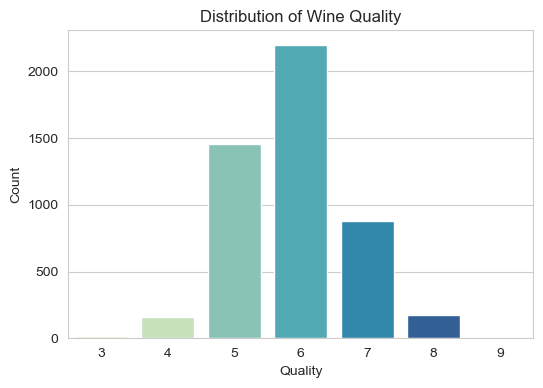

In [10]:
# Plotting a histogram for the 'quality' column
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=df, palette='YlGnBu')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [11]:
df["quality"].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

#### COMMENTS:
There is only 7 categories for our target feature 'quality', with a normal distribution, mode = 6, median = 6, mean = 5.88.
We don't have a lot of data for the extreme values 3 and 9. It is gonna be hard to modelize extreme values.

### PART 1.3 : VARIABLES EXPLORATION

We don't have the units, but for most variables it's probably mg/l or another unit of concentration. For pH, density, there's no unit, and for alcohol it's usually a volume percentage.

Let's look at the table df.describe(), the distribution of the variables, and the correlation of the different variables, to see if I can spot any surprising value.

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854839,0.278399,0.334192,6.393977,0.045772,35.313597,138.363414,0.994033,3.192793,0.489847,10.514259,5.877909
std,0.843855,0.100895,0.121020,5.074381,0.021848,17.014392,42.502534,0.002921,0.153640,0.114126,1.230618,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987000,2.700000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.992000,3.100000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.994000,3.200000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996000,3.300000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.010000,3.800000,1.080000,14.200000,9.000000


C:\Users\frede\AppData\Local\Temp\ipykernel_7312\2564909381.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\frede\AppData\Local\Temp\ipykernel_7312\2564909381.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\frede\AppData\Local\Temp\ipykernel_7312\2564909381.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\frede\AppData\Local\Temp\ipykernel_7312\2564909381.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\frede\AppData\Local\Temp\ipykernel_7312\2564909381.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\frede\AppData\Local\Temp\ipykernel_7312\2564909381.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\frede\AppData\Local\Temp\ipykernel_7312\2564909381.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\frede\AppDa

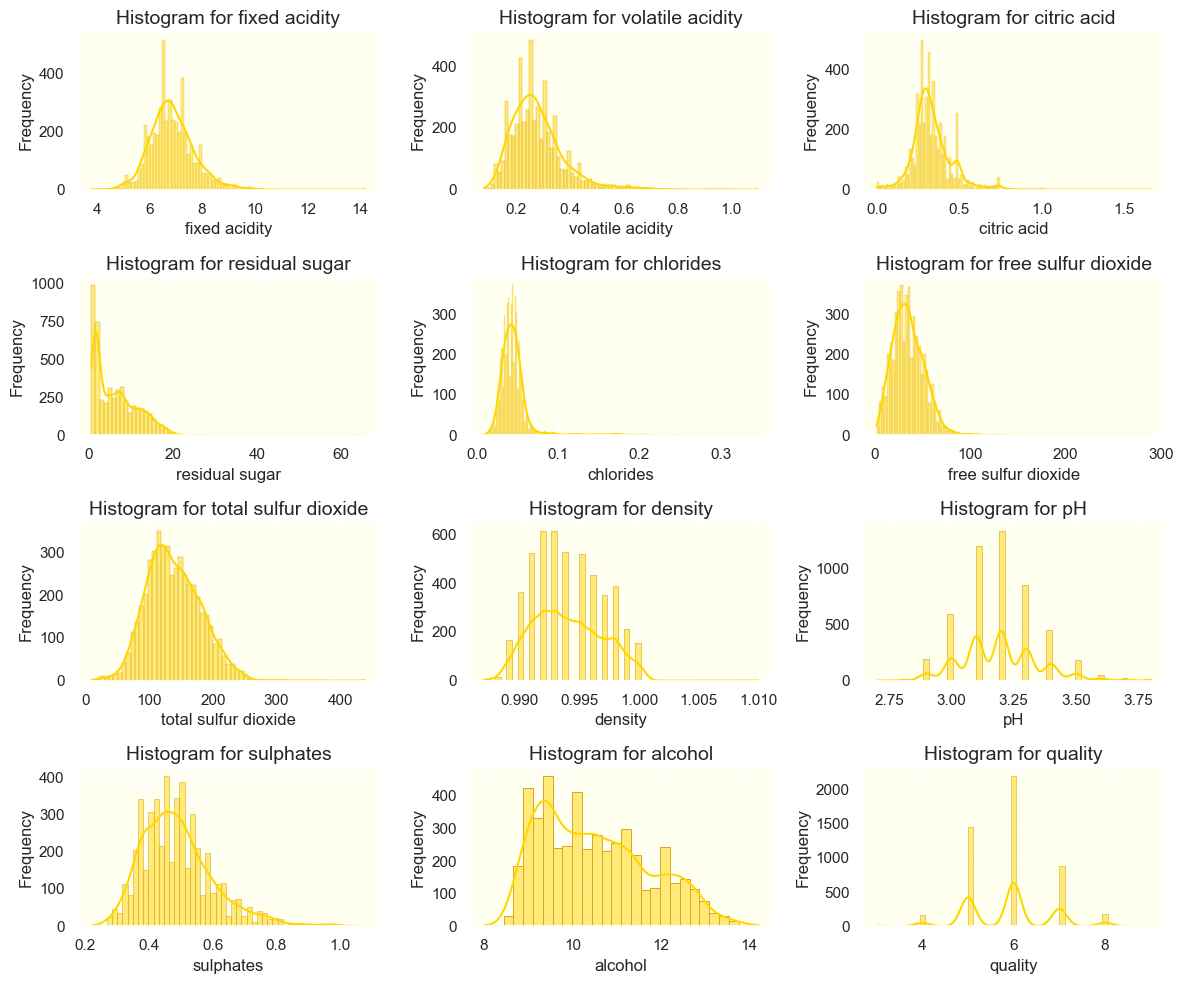

In [13]:
# We have 12 variables, we 'll display 4 rows * 3 columns
n_columns = 3
n_rows = 4

# Setting up the subplots
plt.figure(figsize=(12,10))
sns.set(rc={'axes.facecolor':'ivory', 'figure.facecolor':'ivory'})

for i, column in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_columns, i)
    sns.histplot(df[column], color='gold', edgecolor='goldenrod', kde=True)
    plt.title(f'Histogram for {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()

plt.show()

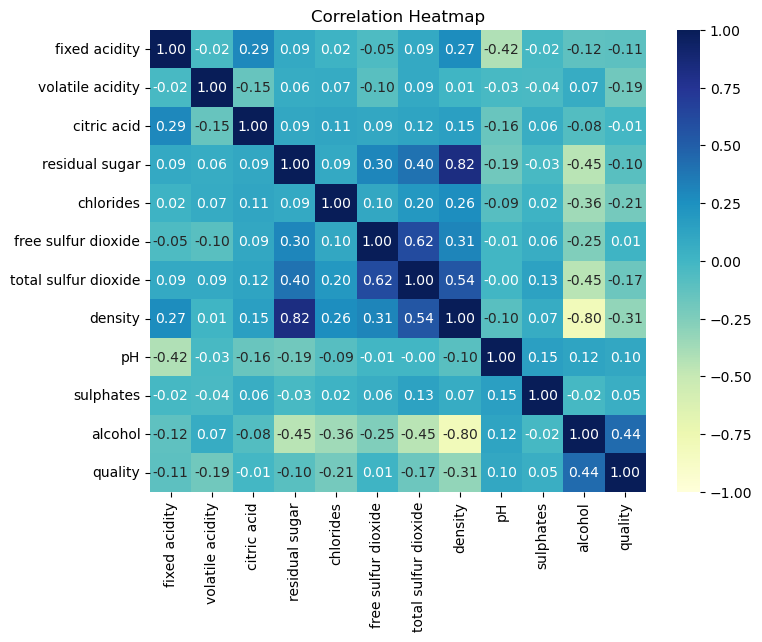

In [14]:
# Calculating the correlation matrix for all variables
correlation_matrix = df.corr()
plt.rcdefaults()


# Popular color maps : ['coolwarm', 'YlGnBu', 'viridis', 'plasma', 'cividis', 'RdBu_r']

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### COMMENTS:
The highest correlation coefficient between the target and the other variables is 0.44 ('alcohol').

The other cofficients between the target and the other variables are between -0.3 and 0.1. I wonder if we will be able to predict anything with such values.

Besides our target variable, there are other interesting correlations:

a positive correlation between residual sugar and density (0.82)
a negative correlation between alcohol and density (-0.80)

Maybe I'll look at it out of curiosity.

### PART 1.4 : CORRELATIONS WITH THE TARGET

Lets first visualize the correlation coefficients between the target and the other variables.

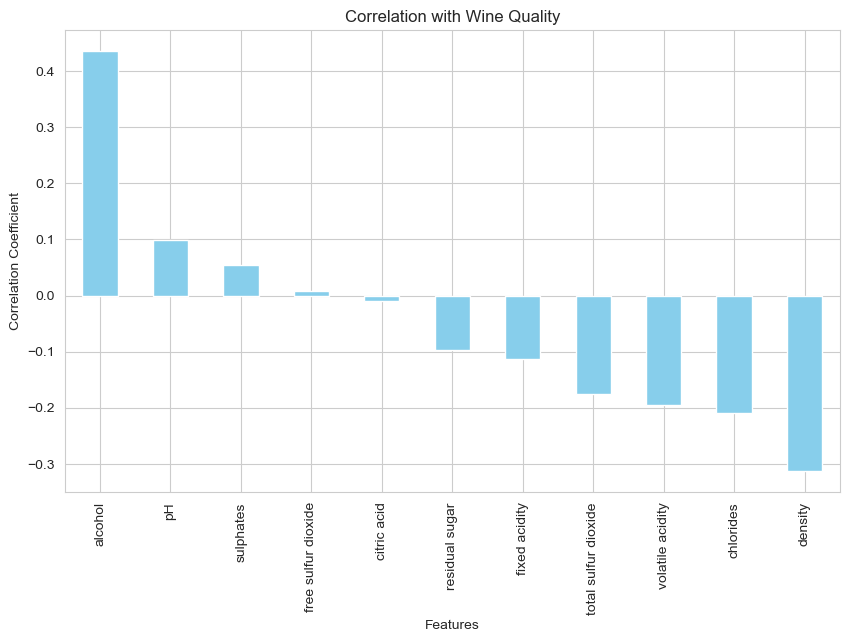

quality                 1.000000
alcohol                 0.435576
pH                      0.098584
sulphates               0.053678
free sulfur dioxide     0.008111
citric acid            -0.009209
residual sugar         -0.097544
fixed acidity          -0.113670
total sulfur dioxide   -0.174699
volatile acidity       -0.194794
chlorides              -0.209934
density                -0.313031
Name: quality, dtype: float64

In [15]:
# Calculating the correlation with the 'quality' column
correlation = df.corr()['quality'].sort_values(ascending=False)

# Plotting the correlations
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
correlation.drop('quality').plot(kind='bar', color='skyblue')
plt.title('Correlation with Wine Quality')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

correlation

#### COMMENTS:

As we've seen before, the highest correlation coefficient between the target and the other variables is 0.44 ('alcohol').

The variables 'density', 'chlorides', 'volatile acidity', and 'total sulfur dioxide' have low negative correlations with the target.

The other variables have very low (close to 0) positive or negative correlations with the target.

Now let's look at the boxplots to visualise the trends of the relationship between the target and the other variables.

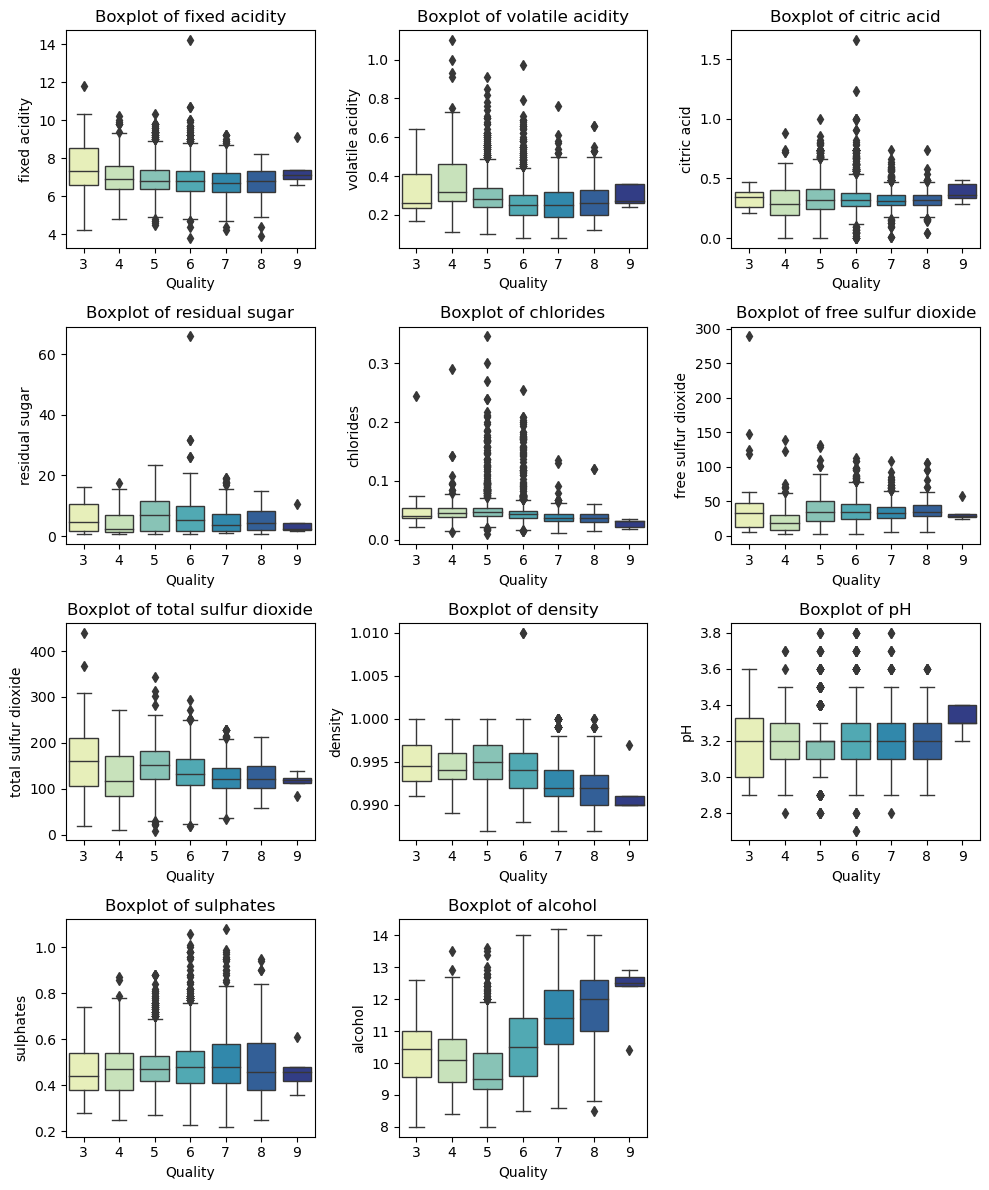

In [16]:
# Plotting boxplots for each variable against the 'quality' column
plt.figure(figsize=(10, 12))
plt.rcdefaults()

# Excluding the 'quality' columnYlGnBu
columns = df.columns[:-1]  

for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='quality', y=column, data=df, palette='YlGnBu', linewidth=1)
    plt.title(f'Boxplot of {column}')
    plt.xlabel('Quality')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

#### COMMENTS:

Those plots confirm the correlation coefficients.

Higher quality wines tend to have higher alcohol percentage.

Higher quality wines tend to have a lower density and lower levels of chlorides and total sulfur dioxide.

Wine rating 9 at quality tend to have higher pH and level of citric acid. Though it is only 5 points of data (0.1% of the data), so this feature may be not representative.

The other variables show no clear trend.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


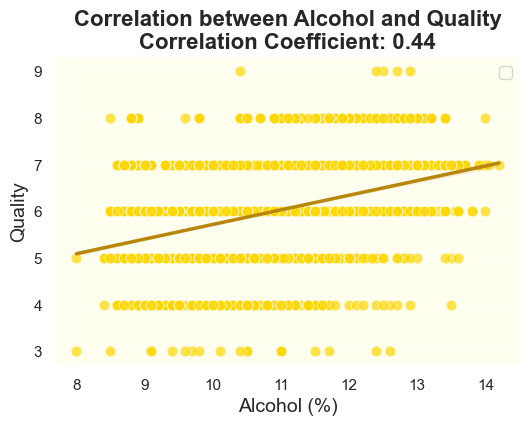

In [17]:
# Plot of the correlation between Alcohol and Quality

correlation_coefficient = df['alcohol'].corr(df['quality'])

plt.figure(figsize=(6, 4))
sns.set(rc={'axes.facecolor':'ivory', 'figure.facecolor':'ivory'})

sns.scatterplot(x='alcohol', y='quality', data=df, color='gold', s=60, alpha=0.7)
sns.regplot(x='alcohol', y='quality', data=df, scatter=False, color='darkgoldenrod', line_kws={'label':f"y = {np.polyfit(df['alcohol'], df['quality'], 1)[0]:.2f}x + {np.polyfit(df['alcohol'], df['quality'], 1)[1]:.2f}", 'linewidth':2.5})

plt.title(f'Correlation between Alcohol and Quality\nCorrelation Coefficient: {correlation_coefficient:.2f}', fontsize=16, fontweight='bold')

plt.xlabel('Alcohol (%)', fontsize=14)
plt.ylabel('Quality', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

#### COMMENTS:

We can see that the target is actually a catagorical variable. Besides that, this visualization doesn't bring much information.

### PART 1.4 : OTHER CORRELATIONS

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


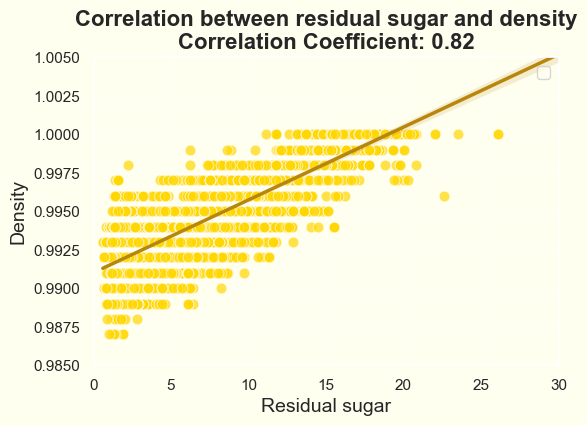

In [18]:
# Plot of the correlation between 'density' and 'residual sugar'

correlation_coefficient = df['residual sugar'].corr(df['density'])

plt.figure(figsize=(6, 4))
sns.set(rc={'axes.facecolor':'ivory', 'figure.facecolor':'ivory'})

sns.scatterplot(x='residual sugar', y='density', data=df, color='gold', s=60, alpha=0.7)
sns.regplot(x='residual sugar', y='density', data=df, scatter=False, color='darkgoldenrod', line_kws={'label':f"y = {np.polyfit(df['alcohol'], df['quality'], 1)[0]:.2f}x + {np.polyfit(df['alcohol'], df['quality'], 1)[1]:.2f}", 'linewidth':2.5})

plt.title(f'Correlation between residual sugar and density\nCorrelation Coefficient: {correlation_coefficient:.2f}', fontsize=16, fontweight='bold')
plt.xlim(0, 30)
plt.ylim(0.985, 1.005)
plt.xlabel('Residual sugar', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


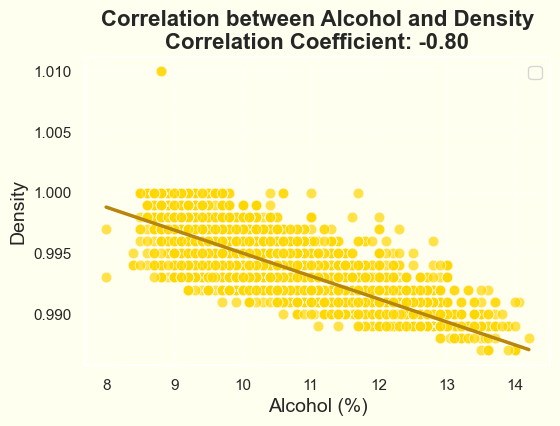

In [19]:
# Plot of the correlation between 'alcohol' and 'density'

correlation_coefficient = df['alcohol'].corr(df['density'])

plt.figure(figsize=(6, 4))
sns.set(rc={'axes.facecolor':'ivory', 'figure.facecolor':'ivory'})

sns.scatterplot(x='alcohol', y='density', data=df, color='gold', s=60, alpha=0.7)
sns.regplot(x='alcohol', y='density', data=df, scatter=False, color='darkgoldenrod', line_kws={'label':f"y = {np.polyfit(df['alcohol'], df['density'], 1)[0]:.2f}x + {np.polyfit(df['alcohol'], df['density'], 1)[1]:.2f}", 'linewidth':2.5})

plt.title(f'Correlation between Alcohol and Density\nCorrelation Coefficient: {correlation_coefficient:.2f}', fontsize=16, fontweight='bold')
plt.xlabel('Alcohol (%)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

#### COMMENTS:

The density has so few different values that it is also almost categorical.

We can observe the positive correlation between 'residual sugar' and 'density', and the negative correlation between 'alcohol' and density.

These plots don't add much information, but I wanted to visualize them as there is quite a strong correlation between these variables.

Let's move on to the predictions.

#### MODELING APPROACH

As we have seen, the values of our target are integers from 3 to 9. This is a task of ordinal regression/classification.

We can approach it from different angles. We can test classification models as well as regression models. We can try neural networks. We can also test the statistical approach, with OrderedModel from statsmodels.miscmodels.ordinal_model.

I'll start with testing and comparing basic regression and classification models, then I'll try OrderedModel and I'll finish with a simple neural network.




# PART 2 : MODELING

All the variables are numerical, so encoding isn't needed.

Some models require scaling (KNeighbors, SVM/SVC), other do not but benefit from it (SGDC). I will test the models with and without scaling (and only with scaling when scaling is necessary). For this I will use the make_pipeline(scaler, model) when making the models.

I could explore various scalers, but I will only test StandardScaler().

But First I will do the train_test_split.

### PART 2.1 : PREPROCESSING

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X = df.drop('quality', axis=1)
y = df['quality']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3918, 11), (980, 11), (3918,), (980,))

In [23]:
scaler = StandardScaler()

OK, now we can move on to the modeling.

### PART 2.2 : MODELS

In [24]:
# Preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Regression models
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Classification models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics and model selection
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, validation_curve, StratifiedKFold, GroupKFold

In [25]:
# Regression models

LR = LinearRegression()
LR_scal = make_pipeline(StandardScaler(), LinearRegression())

RFR = RandomForestRegressor()
RFR_scal = make_pipeline(StandardScaler(), RandomForestRegressor())

GBR_reg = GradientBoostingRegressor()
GBR_reg_scal = make_pipeline(StandardScaler(), GradientBoostingRegressor())

ENR = ElasticNet()
ENR_scal = make_pipeline(StandardScaler(), ElasticNet())

In [26]:
# Classification models

# For Logistic regression, I set multi_class = 'ovr', it's a standard for multiclass, and solver = 'liblinear', because default value 'lbfgs' generates iteration issues with our dataset.
LRC = LogisticRegression(multi_class='ovr', solver='liblinear')
LRC_scal = make_pipeline(StandardScaler(), LogisticRegression(multi_class='ovr', solver='liblinear'))

SGDC = SGDClassifier()
SGDC_scal = make_pipeline(StandardScaler(), SGDClassifier())

RFC = RandomForestClassifier()
RFC_scal = make_pipeline(StandardScaler(), RandomForestClassifier())

GBC = GradientBoostingClassifier()
GBC_scal = make_pipeline(StandardScaler(), GradientBoostingClassifier())

KNC_scal = make_pipeline(StandardScaler(), KNeighborsClassifier())

#LSVC_scal = make_pipeline(StandardScaler(), LinearSVC())

In [27]:
reg_models =         {'LR': LR,
                      'LR_scal': LR_scal,
                      'RFR': RFR,
                      'RFR_scal': RFR_scal,
                      'GBR_reg': GBR_reg,
                      'GBR_reg_scal': GBR_reg_scal,
                      'ENR': ENR,
                      'ENR_scal': ENR_scal,
                     }

In [28]:
class_models =         {
                      'LRC': LRC,
                      'LRC_scal': LRC_scal,
                      'SGDC': SGDC,
                      'SGDC_scal': SGDC_scal,
                      'RFC': RFC,
                      'RFC_scal': RFC_scal,
                      'GBC': GBC,
                      'GBC_scal': GBC_scal,
                      'KNC_scal': KNC_scal,
                      #'LSVC_scal': LSVC_scal,
                      }

In [29]:
list_of_models = list(reg_models.keys()) + list(class_models.keys())

### PART 2.3 : CUSTOM SCORING

In order to compare the models, I want different scores.

For regression models, I want the r2_score. I will use it during the cross validation to detect overfitting.

For classification models, I want the accuracy. I will also use it during the cross validation to detect overfitting 

For both types, I will create my own metrics for this task of prediction :

I will also use the MAE (mean absolute error) and the MAE in percentage, that I will call MAPE. I will calculate them directly within the function of evaluation of the models.

I want the percentage of correct predictions.

I want the percentage of "small errors" of less than 1 quality unit.

I want the maximum error, to see what is the maximum error that the model makes.

Then I create a dataframe to store the result of this scoring, for each model, so I can compare them.

In [30]:
# Calculation of the percentage of predictions that are correct.
# This metric is also called accuracy.

def correct_predictions(y_test, y_pred):
    error = 100*(sum((abs(y_pred-y_test)) == 0) / len(y_test))
    return round(error, 1)

In [31]:
# Calculation of the "small errors", when y_pred is only 1 point distant from y_test.

def errors_under_1_quality_unit(y_test, y_pred):
    error = 100*(sum((abs(y_pred-y_test)) <= 1) / len(y_test))
    return round(error, 1)

In [32]:
# Calculation of the biggest error. We want to avoid big errors.

def max_error(y_test, y_pred):
    error = max(np.abs(y_pred-y_test))
    return round(error, 0)

In [33]:
 # list for saving temporarily the scoring results.

scoring_metrics = []

In [34]:
 # Dataframe to store the scoring results.

comparison_matrix = pd.DataFrame(index = list_of_models, columns =['train_score',
                                                                   'test_score',
                                                                   'overfit',
                                                                   'MAE (absolute values in quality units)',
                                                                   'MAPE (%)',
                                                                   'Correct predictions (%)',
                                                                   'Predictions under 1 unit error (%)',
                                                                   'Maximum error (quality units)'])

In [35]:
comparison_matrix

,train_score,test_score,overfit,MAE (absolute values in quality units),MAPE (%),Correct predictions (%),Predictions under 1 unit error (%),Maximum error (quality units)
LR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LR_scal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RFR_scal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBR_reg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBR_reg_scal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENR_scal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LRC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LRC_scal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### PART 2.4 : EVALUATION PROCESS

In [36]:
# Fit the model on the train set, and make predictions on the test set.

def model_fit_predict(model):
    global y_pred
    y_pred = []
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Convert y_pred to integers, only for the regression models.
    #if model in list_reg_models:
    y_pred = np.around(y_pred, 0)
    y_pred = y_pred.astype(int)

In [37]:
# Apply the different scoring metrics and store them into the list scoring_metrics.

def scoring_reg(model):
    global y_pred
    global scoring_metrics
    scoring_metrics = []
    
    # I use a cross validation with Stratified KFold because there are very few data points in certain categories (9, 3)
    cv = StratifiedKFold(5)

    # For regression models, I use r2 as scoring metric
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=('r2'), return_train_score=True)
    train_score = scores['train_score'].mean()
    test_score = scores['test_score'].mean()
    overfit = train_score - test_score
    
    # The following metrics are the same for both regression and classification
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    mape = round(100 * mae/np.mean(y_test), 2)
    predictions_correct = correct_predictions(y_test, y_pred)
    predictions_errors_under_1_quality_unit = errors_under_1_quality_unit(y_test, y_pred)
    maximum_error = max_error(y_test, y_pred)

    scoring_metrics = [train_score,
                      test_score,
                      overfit,
                      mae,
                      mape,
                      predictions_correct,
                      predictions_errors_under_1_quality_unit,
                      maximum_error]

In [38]:
# Apply the different scoring metrics and store them into the list scoring_metrics.

def scoring_class(model):
    global y_pred
    global scoring_metrics
    scoring_metrics = []
    
    # I use a cross validation with Stratified KFold because there are very few data points in certain categories (9, 3)
    cv = StratifiedKFold(5)

    # For classification models, I use accuracy as scoring metric
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=('accuracy'), return_train_score=True)
    train_score = scores['train_score'].mean()
    test_score = scores['test_score'].mean()
    overfit = train_score - test_score
    
    # The following metrics are the same for both regression and classification
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    mape = round(100 * mae/np.mean(y_test), 2)
    predictions_correct = correct_predictions(y_test, y_pred)
    predictions_errors_under_1_quality_unit = errors_under_1_quality_unit(y_test, y_pred)
    maximum_error = max_error(y_test, y_pred)

    scoring_metrics = [train_score,
                      test_score,
                      overfit,
                      mae,
                      mape,
                      predictions_correct,
                      predictions_errors_under_1_quality_unit,
                      maximum_error]

In [39]:
# Plot the distribution of the errors in a histogram.

plt.rcdefaults()  # restore default settings for matplotlib.pyplot

def errors_graph(model):

    plt.figure(figsize=(6,4))
    title = str(model) + " - Distribution of errors"
    plt.title(title)
    
    error_hist = abs(y_pred-y_test)
    n, bins, patches = plt.hist(error_hist, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    
    plt.xlabel('error (quality units)')
    plt.ylabel('occurrences')
    plt.show()


In [40]:
# Plot the distribution of the y_pred and y-test in a histogram.

def distribution_predictions(model):

    plt.figure(figsize=(6,4))
    title = str(model) + " - Distribution of predictions"
    plt.title(title)

    n, bins, patches = plt.hist(y_test, label = 'y_test', color='gray', histtype='stepfilled', alpha=0.3, density=True, ec="k", bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    n, bins, patches = plt.hist(y_pred, label = 'y_pred', color='gold', histtype='stepfilled', alpha=0.3, density=True, ec="k", bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    plt.xlabel('quality')
    plt.ylabel('occurrences')
    plt.legend()
    plt.show()

In [41]:
# Print the confusion matrix, only for the classification models.

def confusion_classification():
    
    cf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,4))
    title = str(model) + " - Confusion Matrix"
    plt.title(title)

    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='YlGnBu')

    plt.show()

In [42]:
def evaluation_reg(model):
    model_fit_predict(model)
    scoring_reg(model)

In [43]:
def evaluation_class(model):
    model_fit_predict(model)
    scoring_class(model)

### PART 2.5 : MODEL COMPARISON AND SELECTION

In [44]:
# Evaluation of regression models

for name, model in reg_models.items():
    evaluation_reg(model)
    comparison_matrix.loc[name]= scoring_metrics

In [45]:
# Evaluation of classification models

for name, model in class_models.items():
    evaluation_class(model)
    comparison_matrix.loc[name]= scoring_metrics

In [46]:
# I print the comparison_matrix, and style it to see quickly the high and low values.
# I set a green color map to highlight the metrics where I want a high value, and a red color map where I want a low value.

comparison_matrix.style.background_gradient(
    subset=["overfit"], cmap="Reds").background_gradient(
    subset=["MAE (absolute values in quality units)"], cmap="Reds").background_gradient(
    subset=["MAPE (%)"], cmap="Reds").background_gradient(
    subset=["Correct predictions (%)"], cmap="Greens").background_gradient(
    subset=["Predictions under 1 unit error (%)"], cmap="Greens").background_gradient(
    subset=["Maximum error (quality units)"], cmap="Reds")

,train_score,test_score,overfit,MAE (absolute values in quality units),MAPE (%),Correct predictions (%),Predictions under 1 unit error (%),Maximum error (quality units)
LR,0.275209,0.269088,0.006121,0.560000,9.540000,49.800000,94.400000,3
LR_scal,0.275209,0.269088,0.006121,0.560000,9.540000,49.800000,94.400000,3
RFR,0.928712,0.490736,0.437976,0.370000,6.300000,66.500000,97.100000,3
RFR_scal,0.928970,0.492679,0.436291,0.380000,6.480000,65.200000,97.200000,3
GBR_reg,0.505092,0.384515,0.120577,0.500000,8.520000,54.600000,95.900000,3
GBR_reg_scal,0.505092,0.384150,0.120943,0.500000,8.520000,54.500000,95.800000,3
ENR,0.044139,0.042521,0.001618,0.640000,10.910000,44.500000,91.900000,3
ENR_scal,0.000000,-0.000780,0.000780,0.650000,11.080000,44.400000,91.700000,3
LRC,0.530628,0.527563,0.003065,0.550000,9.370000,51.300000,93.900000,3
LRC_scal,0.541092,0.537262,0.003831,0.530000,9.030000,53.400000,94.000000,3


#### COMMENTS:

OVERFITTING:
We can see that the random forest models are very overfit, especially RFR. GBR, GBC and KNC are also a bit overfit.
I discard RFR.

PREDICTIONS:
RFR and RFC are the models that perform best, followed by GBC, GBR, KNC, LR, LRC, ENR, SGDC.
I discard ENR, SGDC, LRC.

MAX_ERROR:
GBC and SGDC have a max_error of 4, all the other have a max_error of 3.
I discard GBC and SGDC.

MAE:
Same as the predictions, RFR and RFC have the lowest MAE, followed by GBC, GBR, KNC, LR, LRC, ENR, SGDC.

SCALING
We can see that scaling does not change significantly the results for these models.


I discarded RFR, ENR, SGDC, LRC, GBC and SGDC.

Let's look at the distribution of errors and distribution of predictions for LR, RFC and KNC without scaling.

In [47]:
def reg_graphs(model):
    evaluation_reg(model)
    errors_graph(model)
    distribution_predictions(model)
    confusion_classification()

In [48]:
def class_graphs(model):
    evaluation_class(model)
    errors_graph(model)
    distribution_predictions(model)
    confusion_classification()

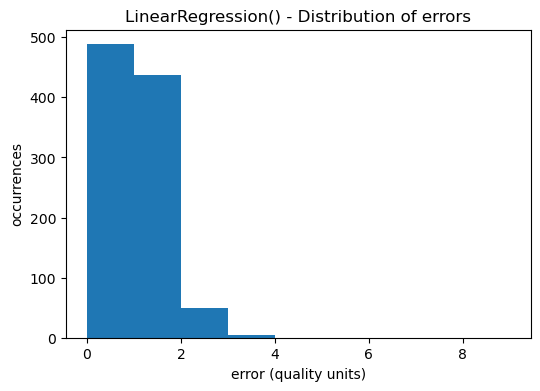

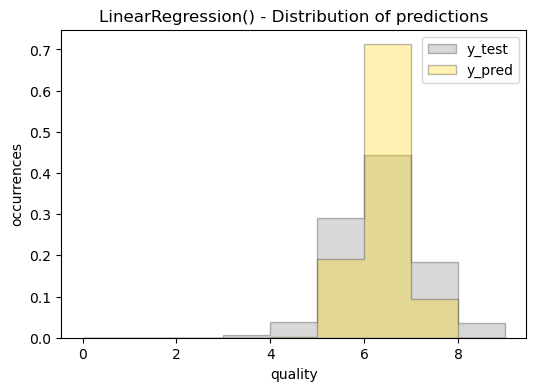

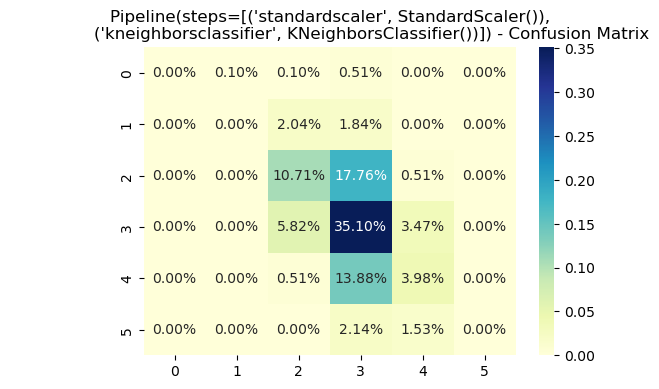

In [49]:
reg_graphs(LR)

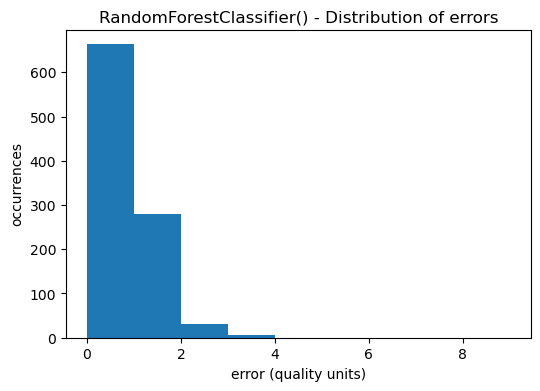

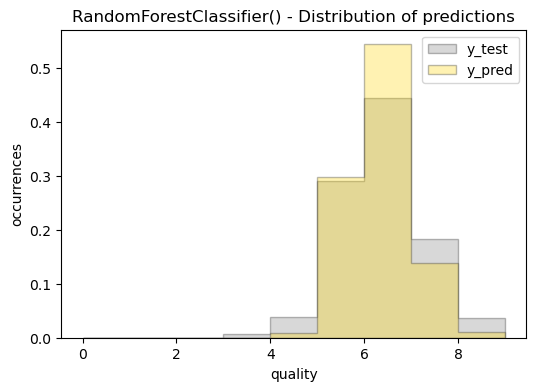

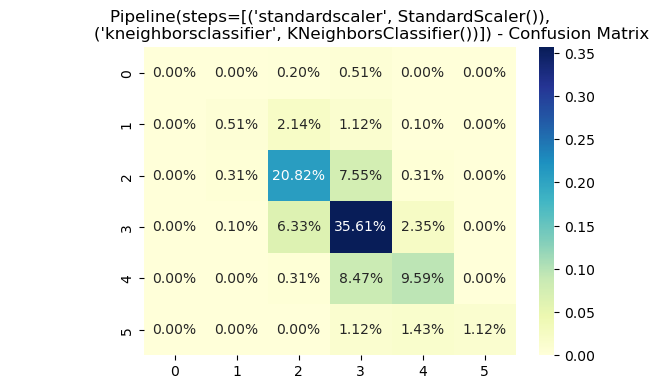

In [50]:
class_graphs(RFC)

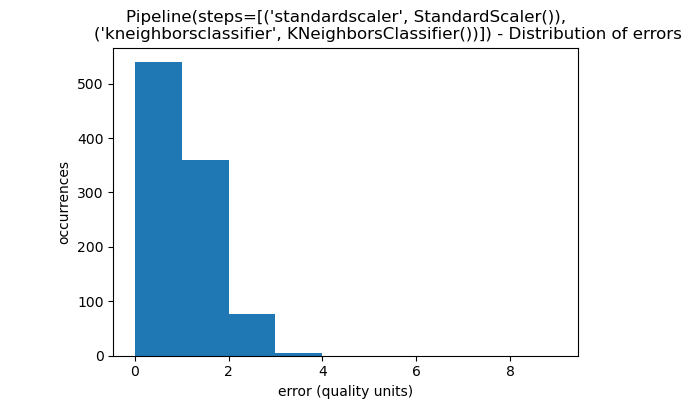

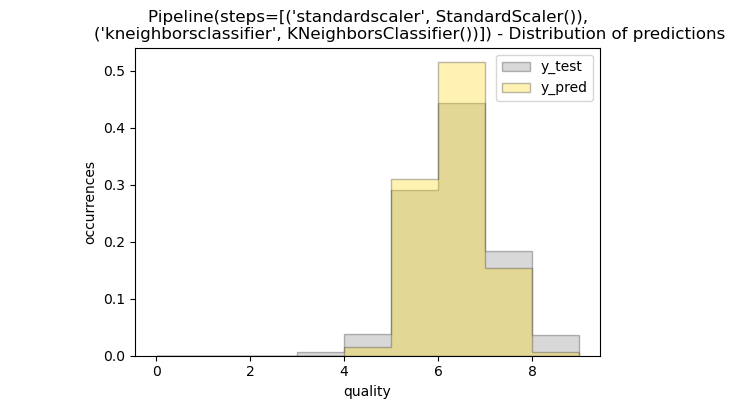

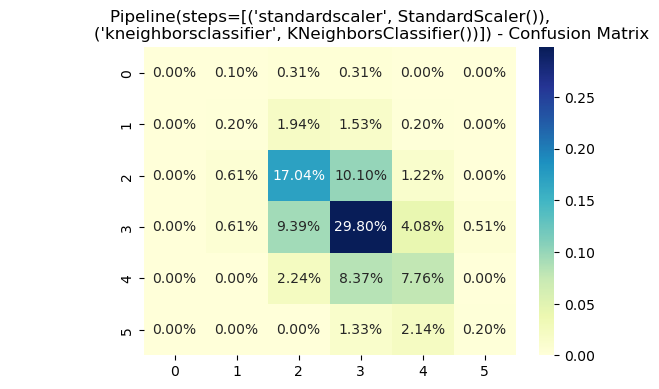

In [51]:
class_graphs(KNC_scal)

#### COMMENTS:

DISTRIBUTION OF ERRORS (BLUE BAR GRAPH):
They show what we could already see in the metrics Correct Predictions (%) and for Predictions under 1 unit error (%).
The best result is RFC, then KNC and LR are quite similar.

DISTRIBUTION OF THE PREDICTIONS (YELLOW/GREY BAR GRAPH):
RFC and KNC show a shape that is quite similar to y_test. LR is not as good, with all the values centered around the mode, and no extreme values.
I discard LR.

CONFUSION MATRIX:
It's pretty but we don't learn a lot.
As with the distribution, LR has values centered around the mode, while RFC and KNC have values a bit more distributed.

CONCLUSION:
I will fine tuning RFC and KNC, then I will look into ordinal regression/classification models and neural networks.

## PART 3 : OPTIMISATION OF RANDOM FOREST CLASSIFIER

In [52]:
from sklearn.model_selection import validation_curve, GridSearchCV, RandomizedSearchCV

In [53]:
cv = StratifiedKFold(5)
RFC_base = RandomForestClassifier()

I decide to start with validation curves and not GridSearchCV or RandomSearchCV. I will use them later on a reduced range of parameters.

### PART 3.1 : VALIDATION CURVES

In [54]:
# Define the parameters to test

param_ranges = {
    'n_estimators': np.arange(10, 201, 20),
    'max_depth': np.arange(1, 32, 3),
    'min_samples_split': np.arange(2, 21, 2),
    'min_samples_leaf': np.arange(1, 15)
}

In [55]:
# Function to compute and plot the validation curves 

def compute_and_plot_validation_curve(model, X, y, param_name, param_range):
    
    train_scores, test_scores = validation_curve(model,
                                                 X, y,
                                                 param_name=param_name,
                                                 param_range=param_range,
                                                 cv=5,
                                                 scoring="accuracy",
                                                 n_jobs=-1)
    

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    

    plt.figure()
    plt.title(f"Validation Curve for {param_name}")
    plt.xlabel(param_name)
    plt.ylabel("Score")
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

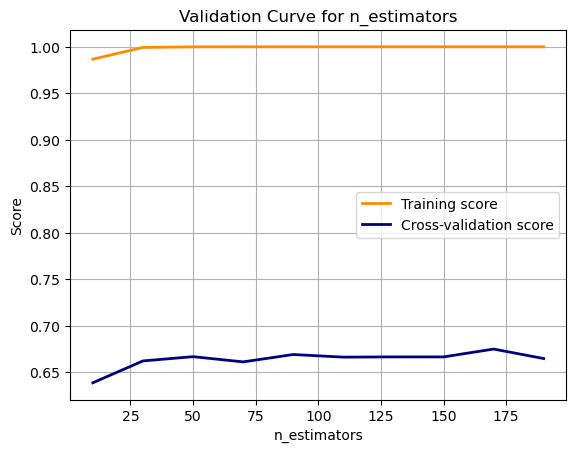

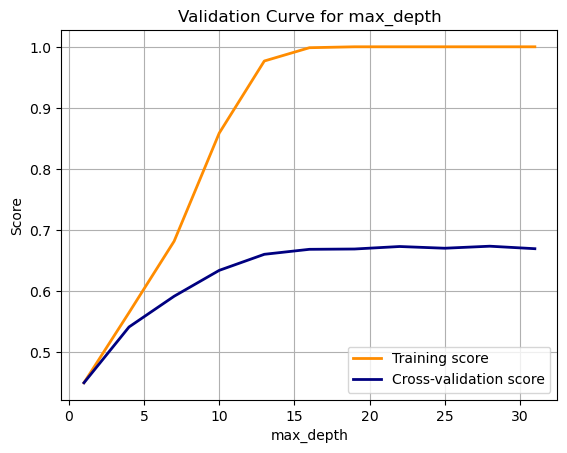

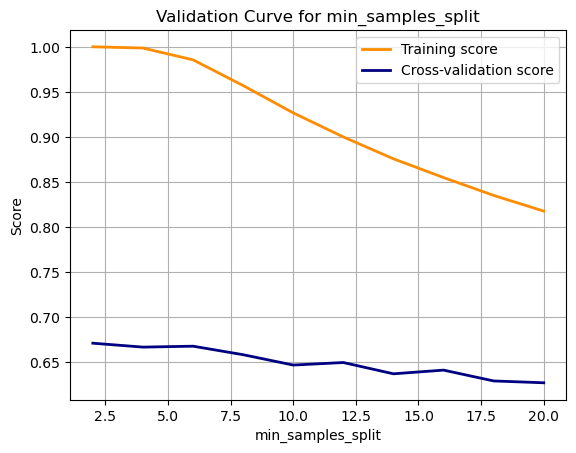

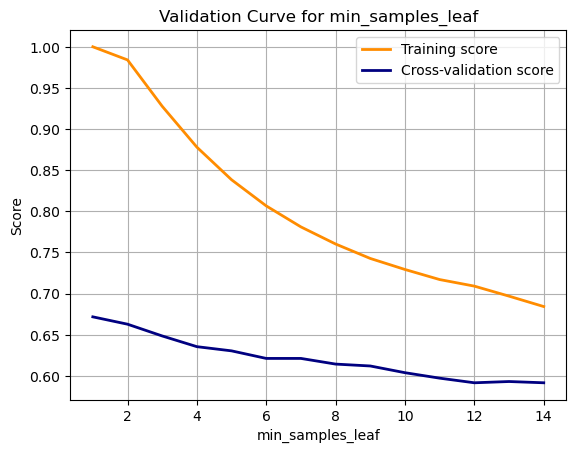

In [56]:
# Run validation curve computation and plotting for each parameter

for param_name, param_range in param_ranges.items():
    compute_and_plot_validation_curve(RFC_base, X_train, y_train, param_name, param_range)

Now that we have an idea of the best values for each parameter, Let's run a targetted GridSearchCV. I also add the parameter 'max_features' (string).

### PART 3.2 : GRIDSEARCHCV

In [57]:
# Define the parameters to test

param_grid = {
    'n_estimators': [80, 90, 100],
    'max_depth': [17, 18, 19, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

In [58]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           n_jobs=-1, 
                           verbose=2)

In [59]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [17, 18, 19, 20], 'min_samples_leaf': [1],
                         'min_samples_split': [2],
                         'n_estimators': [80, 90, 100]},
             scoring='accuracy', verbose=2)

In [60]:
# Get the best parameters and the best model
RFC_best_params = grid_search.best_params_
RFC_best_model = grid_search.best_estimator_

RFC_best_params

{'max_depth': 19,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 90}

### PART 3.3 : RESULTS WITH RANDOM FOREST

In [61]:
RFC_models = {"RFC_base": RFC_base,
             "RFC_best_model": RFC_best_model,
             }

In [62]:
# I reset the list scoring_metrics and the dataframe comparison_matrix

scoring_metrics = []

comparison_matrix = pd.DataFrame(index = RFC_models.keys(), columns =      ['train_score',
                                                                           'test_score',
                                                                           'overfit',
                                                                           'MAE (absolute values in quality units)',
                                                                           'MAPE (%)',
                                                                           'Correct predictions (%)',
                                                                           'Predictions under 1 unit error (%)',
                                                                           'Maximum error (quality units)'])

In [63]:
y_pred = RFC_best_model.predict(X_test)

In [64]:
for name, model in RFC_models.items():
    evaluation_class(model)
    comparison_matrix.loc[name]= scoring_metrics

In [65]:
comparison_matrix

,train_score,test_score,overfit,MAE (absolute values in quality units),MAPE (%),Correct predictions (%),Predictions under 1 unit error (%),Maximum error (quality units)
RFC_base,1.0,0.668962,0.331038,0.35,5.96,69.1,96.1,3
RFC_best_model,1.0,0.673809,0.326191,0.36,6.13,67.8,96.6,5


#### COMMENTS:

There is no real improvement on the results after fine tuning the model, and it is still overfit.
Though the predictions are not that bad, 66-67% of correct predictions, 96-97% of predictions with less than 1 quality unit of error, it's certainly better than what I would do if I gave a grade to the wines.

I will tune KNC now.

## PART 4 : OPTIMISATION OF K NEIGHBORS CLASSIFIER

In [66]:
from sklearn.model_selection import validation_curve, GridSearchCV, RandomizedSearchCV

In [67]:
cv = StratifiedKFold(5)
KNC_base = KNeighborsClassifier()

### PART 4.1 : VALIDATION CURVES

In [68]:
# Define the parameters to test

param_ranges = {
    'n_neighbors': np.arange(1, 201, 5),
    'leaf_size': np.arange(10, 101, 10)
}

In [69]:
# Splitting the data into features and target variable
#X = df.drop('quality', axis=1)
#y = df['quality']

# Splitting the dataset into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# Function to compute and plot the validation curves 

def compute_and_plot_validation_curve(model, X, y, param_name, param_range):
    
    train_scores, test_scores = validation_curve(model,
                                                 X, y,
                                                 param_name=param_name,
                                                 param_range=param_range,
                                                 cv=5,
                                                 scoring="accuracy",
                                                 n_jobs=-1)
    

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    

    plt.figure()
    plt.title(f"Validation Curve for {param_name}")
    plt.xlabel(param_name)
    plt.ylabel("Score")
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

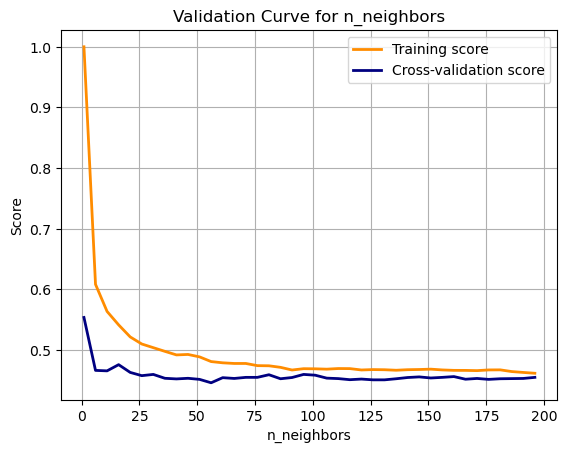

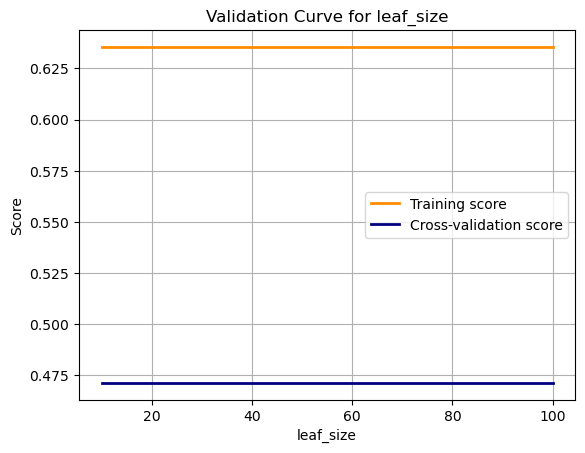

In [71]:
# Run validation curve computation and plotting for each parameter

for param_name, param_range in param_ranges.items():
    compute_and_plot_validation_curve(KNC_base, X_train, y_train, param_name, param_range)

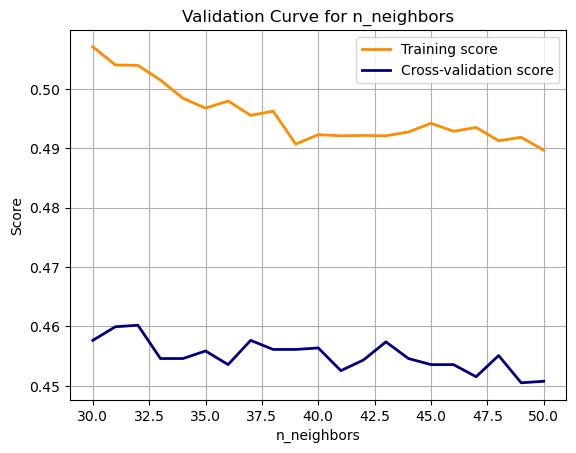

In [72]:
compute_and_plot_validation_curve(KNC_base, X_train, y_train, 'n_neighbors', np.arange(30,51,1))

Now that we have an idea of the best values for each parameter, Let's run a targetted GridSearchCV. I also add the parameter 'max_features' (string).

### PART 4.2 : GRIDSEARCHCV

In [73]:
# Define the parameters to test

param_grid = {
    'n_neighbors': [37],
    'leaf_size': [20],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [74]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           n_jobs=-1, 
                           verbose=2)

In [75]:
# Fit the grid search to the data

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


D:\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.45763351 0.59749818 0.45763351 0.59749818 0.45763351 0.59749818
        nan 0.59749818]
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20], 'n_neighbors': [37],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [76]:
# Get the best parameters and the best model
KNC_best_params = grid_search.best_params_
KNC_best_model = grid_search.best_estimator_

KNC_best_params

{'algorithm': 'auto',
 'leaf_size': 20,
 'n_neighbors': 37,
 'weights': 'distance'}

### PART 4.3 : RESULTS WITH K NEIGHBORS CLASSIFIER

In [77]:
KNC_models = {"KNC_base": KNC_base,
             "KNC_best_model": KNC_best_model,
             }

In [78]:
# I reset the list scoring_metrics and the dataframe comparison_matrix

scoring_metrics = []

comparison_matrix = pd.DataFrame(index = KNC_models.keys(), columns =      ['train_score',
                                                                           'test_score',
                                                                           'overfit',
                                                                           'MAE (absolute values in quality units)',
                                                                           'MAPE (%)',
                                                                           'Correct predictions (%)',
                                                                           'Predictions under 1 unit error (%)',
                                                                           'Maximum error (quality units)'])

In [79]:
y_pred = KNC_best_model.predict(X_test)

In [80]:
for name, model in KNC_models.items():
    evaluation_class(model)
    comparison_matrix.loc[name]= scoring_metrics

In [81]:
comparison_matrix

,train_score,test_score,overfit,MAE (absolute values in quality units),MAPE (%),Correct predictions (%),Predictions under 1 unit error (%),Maximum error (quality units)
KNC_base,0.635528,0.471416,0.164113,0.65,11.08,46.7,89.3,4
KNC_best_model,1.0,0.597498,0.402502,0.47,8.01,59.9,94.2,3


#### COMMENTS:

There is an improvement after tuning the model, though the results are still not as good as the random forest model, and the model is now overfit.